In [10]:
import sncosmo
from ztf_supernova import load_sn
from mangler import SEDMangler

# add the CSP band with a more common naming
band = sncosmo.get_bandpass("cspv9844")
sncosmo.register(band, 'cspv', force=True)

In [11]:
ztfname = "ZTF18abvtcyi"
#ztfname = "ZTF18adaruzw"
source = "hsiao"
data, z, mwebv, t0 = load_sn(ztfname)

sedmangler = SEDMangler(data, source, z, mwebv, phase_range=(-10, 88))
sedmangler.mangle_sed()

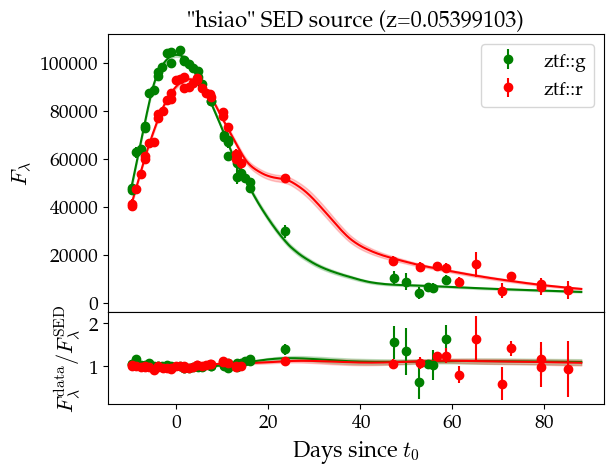

In [13]:
sedmangler.plot_fit()

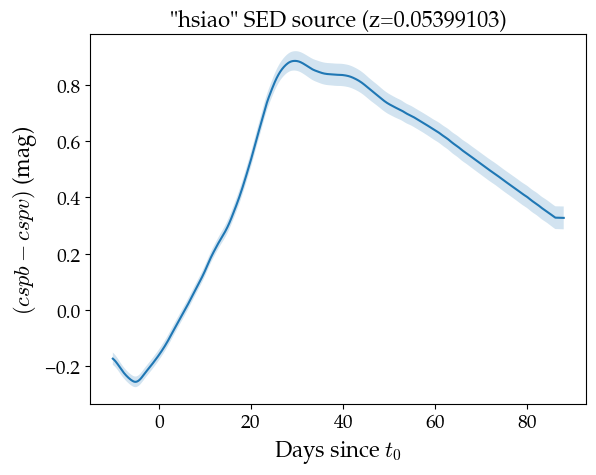

In [9]:
sedmangler.calculate_colour("cspb", "cspv")

In [14]:
sedmangler.st, sedmangler.st_err

(np.float64(0.9733333333333287), np.float64(0.07877965966965471))